# Linear Regression

This Jupyer notebook goes over the different functions made to create the Regression project. I cover items such as creating data, cost functions, loss functions, and gradient descent.

### Imports

For the imports I am using three, Numpy, Pandas, and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

The first step is to generate the linear data. For this I am using the Numpy Linspace to generate an integer array from 0 to 15, this array is then saved as <b><i>x</i></b>. For my <b><i>y</i></b> I am using the array <b><i>x</i></b> and multiypling it by 2 and adding 1 to get a linear line. 

Lastly, I am plotting the data in a scatter plot.

In [5]:
x = np.linspace(0, 15, 50)
y = 2 * x + 1    

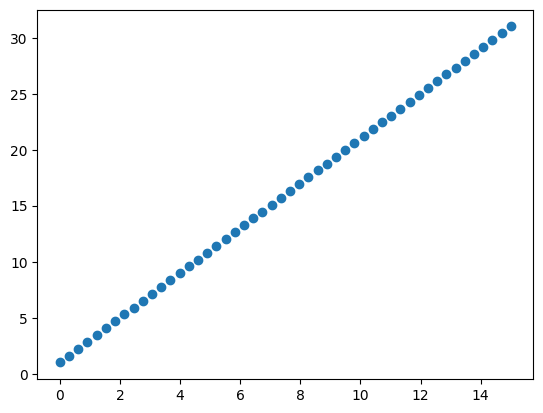

In [6]:
plt.scatter(x,y)
plt.show()

This is perfect for our linear model, however it is too perfect. I am adding noise to the data using Numpy Random. This is making an array of length <b><i>y</i></b> with random variables with a 2.5 standard deviation.

I am then adding that noise to <b><i>y</i></b> to create a more realistic dataset. Then plotting it with a scatter plot.

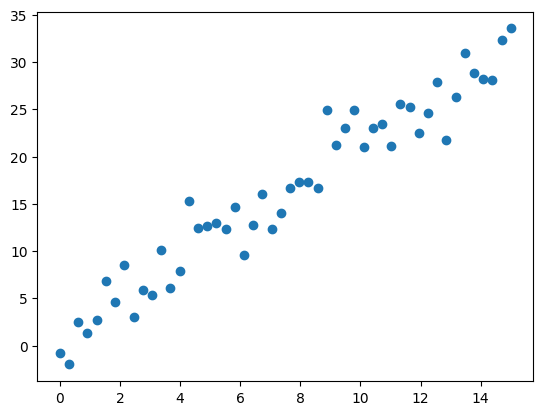

In [7]:
noise = np.random.normal(0, 2.5, len(y)) 
y = y + noise
plt.scatter(x,y)
plt.show()

### Cost Function

$$
\text{The cost function is:} \\
J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2
$$


$$
\text{where,} \\
f_{w,b}(x^{(i)}) = wx^{(i)} + b
$$

Using the cost function I can calculate the difference of my predicted <b><i>y</i></b> and my actual <b><i>y</i></b>


In [8]:
def compute_cost(x,y,w, b):
    f_wb = w * x + b

    m = len(x)
    cost = (f_wb - y) ** 2        
    j_wb = (1/(2 * m)) * np.sum(cost)

    return j_wb

Below is the cost of my data using 1 for the w and b parameters

In [9]:
print(compute_cost(x,y,1,1))

43.83770977292851


### Gradient Function

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [10]:
def compute_gradient(x,y,w,b):
    m = len(x)
    f_wb = w * x + b
    dj_dw = (np.sum((f_wb - y) * x)) / m
    dj_db = (np.sum(f_wb - y)) / m

    return dj_dw, dj_db

Below is the cost of my data using 1 for the w and b parameters

In [11]:
print(compute_gradient(x,y,1,1))

(-78.92760562875986, -7.788698050036994)


### Gradient Function

Gradient descent is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
$$


In [12]:
def compute_gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):
    J_history = []
    p_history = []

    alpha = alpha
    num_iters = num_iters
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            J_history.append( compute_cost(x,y,w,b))
            p_history.append([w,b])
    return w, b, J_history, p_history

I can use the gradient descent on my data and use that to create a prediction line

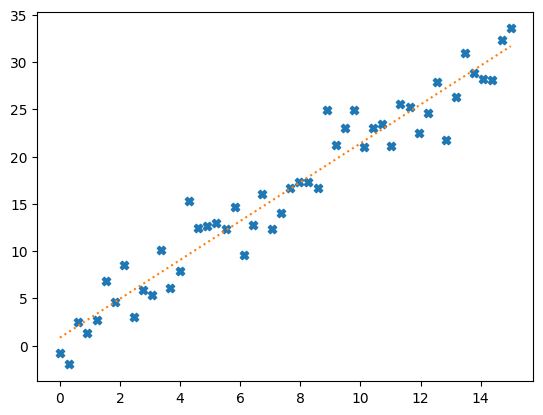

In [15]:
w_final, b_final, J_hist, p_hist = compute_gradient_descent(x ,y, 0, 0, 1.0e-2,1000, compute_cost, compute_gradient)

new_x = np.linspace(0, 15, 50)
new_y = w_final * x + b_final

fig = plt.figure()
plt.scatter(x, y,marker='X')
plt.plot(new_x,new_y, linestyle = 'dotted',color='C1')
plt.show()